## Lecture: Digitale Musikanalyse

Christof Weiß, Computational Humanities group

# Exercise 1 - Music Representations

In this exercise, we apply our knowledge from the first lecture on music representations. We search for different types of music data on the web, conduct simple calculations on pitch and frequency, and write first functions in Python. The following FMP notebooks provide useful code snippets and can be helpful:
* [Musical Notes and Pitches](../C1/C1S1_MusicalNotesPitches.ipynb)
* [Frequency and Pitch](../C1/C1S3_FrequencyPitch.ipynb)
* [Pythagorean Tuning](../C1/C1E10_PythagoreanTuning.ipynb)

## 0. Preparation

If not yet done, please create a subfolder named __"ExerciseMIR"__ within the __"FMP"__ folder. Download and save this notebook in the ExerciseDMA folder. Inside this folder, create another subfolder named __"data"__.

## 1. Music data search

### 1.1 Search terms

Let's work with Jupy(i)ter! Please search for freely available music data on Wolfgang Amadeus Mozart's "Jupiter" symphony. First, find out, which index and search terms could be suitable for finding and identifying this work. Then, find out which archives and websites provide freely available data on this musical piece.

Answer: youtube

### 1.2 Music representations

Now, search the [Petrucci Music Library](https://www.imslp.org) (International Music Score Library Project, IMSLP) on the Mozart symphony. What types of music representations can you find, and in which data format (file endings) are those? How do the different versions of each representations differ from each other (e.g., different types of score)? Which kind of licenses are specified for using the different files?

Answer:
[Search result](https://imslp.org/wiki/Symphony_No.41_in_C_major,_K.551_(Mozart,_Wolfgang_Amadeus))

Types of Representations:
* Audio (.mp3)
* Sheet music (.pdf)
* No Symbolic representations available (except one from sythesized)

### 1.3 Metadata

What kind of information (metadata) on the work can be found on the IMSLP?

Answer:
* Movements
* Komponist
* Composition Year
* Genre

Work Title 	Symphony No.41
Alternative Title 	Jupiter Symphony
Name Translations 	Symphonie nº 41 de Mozart; Symphony No. 41; 第41號交響曲 (莫扎特); ซิมโฟนีหมายเลข 41; জুপিটার সিমফোনি; [26 more...]
Name Aliases 	Sinfonie C-Dur KV 551; Jupiter-Sinfonie; Symphony No. 41 in C major; K. 551; Sinfonia n. 41 in Do maggiore K 551; [6 more...]
Authorities 	WorldCat; Wikipedia; VIAF: 182681837; LCCN: n81018422; GND: 300111169; [2 more...]
Composer 	Mozart, Wolfgang Amadeus
Opus/Catalogue Number 	K.551
I-Catalogue Number 	IWM 575
Key 	C major
Movements/Sections 	4 movements:

    Allegro vivace
    Andante cantabile
    Menuetto: Allegretto
    Molto allegro

Year/Date of Composition 	1788 (August 10)
First Publication 	1793 (parts); 1807-10 (score)

    Score - London: Cianchettini & Sperati (A Compleat Collection....No.XVIII)
    Parts - Offenbach: Johann André, Plate 622, 13 parts

Composer Time Period 	Classical
Piece Style 	Classical
Instrumentation 	orchestra
InstrDetail 	[more...]
External Links 	Wikipedia article
NMA score
NMA report (German)
Mozart's Symphonies: Context, Performance Practice, Reception

### 1.4 Audio

Download one of the _Public Domain_ audio files from the IMSLP, rename it to _jupiter.mp3_. and move the file to the __data__ subfolder. Load the audio file into the notebook, retrieve the sample rate, and compute the full length in seconds (hint: the notebook [../B/B_PythonAudio.ipynb](../B/B_PythonAudio.ipynb) provides useful code). Extract the first 15 seconds and add a player for this excerpt here in the notebook.

/home/mpk/anaconda3/envs/FMP/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Sample rate: Fs =  44100
Length: 27:07 minutes
Jupiter von Mozart: Fs = 44100, x.shape = (661500,), x.dtype = float32


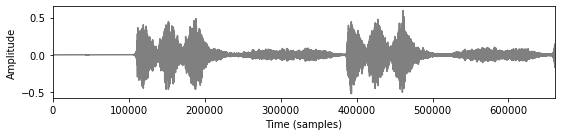

In [14]:
import os
import numpy as np
from matplotlib import pyplot as plt
import IPython.display as ipd
import librosa
import pandas as pd
%matplotlib inline

### your code here
def print_plot_play(x, Fs, text=''):
    """1. Prints information about an audio singal, 2. plots the waveform, and 3. Creates player

    Notebook: C1/B_PythonAudio.ipynb

    Args:
        x: Input signal
        Fs: Sampling rate of x
        text: Text to print
    """
    print('%s Fs = %d, x.shape = %s, x.dtype = %s' % (text, Fs, x.shape, x.dtype))
    plt.figure(figsize=(8, 2))
    plt.plot(x, color='gray')
    plt.xlim([0, x.shape[0]])
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    ipd.display(ipd.Audio(data=x, rate=Fs))


# load audio
filepath_mp3 = "data/jupiter.mp3"
# sr = sample rate, None preserves the native sample rate
x, Fs = librosa.load(os.path.join(filepath_mp3), sr=None)
length_in_seconds = len(x) / Fs

print('Sample rate: Fs =  %0.0f' % (Fs))
print('Length: %1d:%02d minutes' % (length_in_seconds // 60, np.remainder(length_in_seconds, 60)))

# create audio player

first_15_seconds = x[0:15 * Fs]
print_plot_play(x=first_15_seconds, Fs=Fs, text='Jupiter von Mozart:')

## 2. Pitches and center frequencies

Using the [MIDI note numbers](../notebooks/C1/C1S2_MIDI.ipynb) as pitch identifiers, we can associate to each pitch $p\in[0:127]$ a **center frequency** $F_\mathrm{pitch}(p)$ (measured in Hz) defined as follows:

$$
F_\mathrm{pitch}(p) = 2^{(p-69)/12} \cdot 440\mathrm{Hz}.
$$

#### 2.1 Frequency ratio of subsequent pitches

Using this formula, compute the frequency ratio $F_\mathrm{pitch}(p+1)/F_\mathrm{pitch}(p)$ of two subsequent pitches $p+1$ and $p$. This can be done with __pen and paper!__

$$
F_\mathrm{pitch}(0) = 2^{(0-69)/12} \cdot 440\mathrm{Hz}.
$$

#### 2.2 Frequency ratio of pitches with distance $k$

How does the frequency $F_\mathrm{pitch}(p+k)$ for some $k\in\mathbb{Z}$ relate to $F_\mathrm{pitch}(p)$? 


#### 2.3 Semitone distance for arbitrary frequencies

Derive a formula for the distance (in semitones) for two arbitrary frequencies $\omega_1$ and $\omega_2$.

Answer: See slide 63 multiply with 12 instead of 1200


## 3. Frequencies, global tuning, and concert pitch

In the formula for $F_\mathrm{pitch}(p)$ given above, the MIDI note number $p=69$ serves as reference and corresponds to the __concert pitch__ $\mathrm{A4}$. In __standard tuning__, this pitch has a frequency of $\mathrm{440~Hz}$.

#### 3.1 Computation of center frequencies

Implement a function _F\_pitch(p)_ for computing the center frequencies using the formula for $F_\mathrm{pitch}(p)$ given above.

In [15]:
def F_pitch(p):
    ### your code here
    frequency = (2 ** ((p - 69) / 12)) * 440

    return frequency


print(F_pitch(70))

466.1637615180899


#### 3.2 Compute center frequencies

Use the function to print the center frequencies for the pitches $\mathrm{G\sharp}4$, $\mathrm{A4}$, and $\mathrm{B\flat4}$.

In [16]:
### your code here
print('Gsharp4: ' + str(F_pitch(68)))
print('A4: ' + str(F_pitch(69)))
print('Bflat4: ' + str(F_pitch(70)))

Gsharp4: 415.3046975799451
A4: 440.0
Bflat4: 466.1637615180899


#### 3.3 Parameterization of the concert pitch

Extend your function from above, now also parameterizing the concert pitch _F\_pitch\_tuned(p, F_concert)_.

In [17]:
def F_pitch_tuned(p, F_concert):
    ### your code here
    ### your code here
    frequency = (2 ** ((p - 69) / 12)) * F_concert

    return frequency


#### 3.4 Compute center frequencies using different global tuning

When performing Early Music (e.g., from the Baroque era) in __historical performance practice__, a lower global tuning is typically used. A common concert pitch is $\mathrm{415~Hz}$.  
Using the function _F\_pitch\_tuned(p, F\_concert)_, print the center frequencies for the pitches $\mathrm{G\sharp}4$, $\mathrm{A4}$, and $\mathrm{B\flat4}$ with a concert pitch of $\mathrm{415~Hz}$.

In [18]:
### your code here
print('Gsharp4: ' + str(F_pitch_tuned(68, 415)))
print('A4:' + str(F_pitch_tuned(69, 415)))
print('Bflat4:' + str(F_pitch_tuned(70, 415)))

Gsharp4: 391.70783976290284
A4:415.0
Bflat4:439.6771841591075


#### 3.5 Comparison

Compare the frequency values from __3.2__ and __3.4__. What can you observe? Compute the frequency difference in __Cents__ between pitch $\mathrm{A4}$ in historical tuning and $\mathrm{G\sharp}4$ in standard tuning. How does this compare to the frequency difference of a semitone?

In [19]:
### your code here
import math

diff_cents = math.log2(F_pitch(68) / F_pitch_tuned(69, 415)) * 1200
print('Difference in Cents: %0.1f' % diff_cents)

Difference in Cents: 1.3


## EXTRA TASK: Syntonic Comma

When using __pure intervals__ with mathematically exact frequency ratios, one can compute the frequencies of intervals in a different way than in the equal temperament used above. In the notebook [Pythagorean Tuning](../notebooks/C1/C1E10_PythagoreanTuning.ipynb), this is shown for the __Pythagorean Temperament__ based on the ratio of the __pure perfect fifths__ (3:2).

#### 4.1 Interval computation in semitones

What are the MIDI pitch numbers $p$ of the pitches $\mathrm{C4}$ and $\mathrm{E4}$? Compute and print their distance in semitones $\Delta$. What is the specific interval formed by these two pitches?

In [25]:
import math

### your code here
c_4_midi: int = 60
e_4_midi: int = 64


# Warum math.log2 *12
# Warum nicht einfach stumpf die Differenz der beiden Midi Definitionen ausrechnen
# auch wenn das jetzt nicht soo viel bringt ist das ergebnis doch genauer??

# umstellung von der Formel von 2.
distance_in_semitones: int = math.log2(abs(F_pitch(c_4_midi) / F_pitch(e_4_midi))) * 12

print(distance_in_semitones)


-4.000000000000001


#### 4.2 Interval computation from the harmonic series
The pitches $\mathrm{C4}$ and $\mathrm{E4}$ also occur in the harmonic series constructed above the pitch $\mathrm{C2}$ (see lecture slides). Which partial numbers do they have? What is the frequency relationship (in integers) between $\mathrm{E4}$ and $\mathrm{C2}$, and between $\mathrm{E4}$ and $\mathrm{C4}$?

Dt. translation: Welche halbtoene haben sie?


In [27]:
e_4_midi: int = 64
c_4_midi: int = 60
c_2_midi: int = 36

print("Relationship of E4 / C2")
print(str(F_pitch(e_4_midi)/F_pitch(c_2_midi)))

print("Relationship of E4 / C4")
print(str(F_pitch(e_4_midi)/F_pitch(c_4_midi)))

Relationship of E4 / C2
5.039684199579493
Relationship of E4 / C4
1.2599210498948732


#### 4.3 Compute the syntonic comma

In __Pythagorean tuning__, the frequency of $\mathrm{E4}$ can be constructed by concatenating the frequency ratio of a pure perfect fifth (3:2) __four times__.  
The __Pythagorean comma__ (see the notebook [Pythagorean Tuning](../notebooks/C1/C1E10_PythagoreanTuning.ipynb)) denotes the fine frequency difference between twelve pure perfect fifths and seven octaves. In a similar fashion, the __syntonic comma__ denotes the frequency difference between a __Pythagorean major third__ (four concatenated fifths) and a __pure major third__ (as occurring in the harmonic series). Compute the ratio and the difference in Cent for the syntonic comma by filling the code cell below.

In [30]:
### your code here:

# ratio of four concatenated pure perfect fifths:
ratio_third_pyth = (3/2)*4
print("ratio_perfect_fifth: " + str(ratio_third_pyth))

# integer ratio of pitches E4 and C2 in the harmonic series (pure third):
ratio_third_pure = 5/1

# syntonic comma: "ratio of ratios"
ratio_syntonic_comma = ratio_third_pure/ratio_third_pyth

# syntonic comma: difference in Cents:
syntonic_comma_cents = 2

print('Syntonic comma, frequency ratio: %0.3f' % ratio_syntonic_comma)
print('Syntonic comma, difference in Cents: %0.1f' % syntonic_comma_cents)

ratio_perfect_fifth: 6.0
Syntonic comma, frequency ratio: 2.000
Syntonic comma, difference in Cents: 2.0


#### 4.4 Listen to two frequencies a syntonic comma apart

Now, use all your implemented functions together to listen to the syntonic comma difference (you only have to execute the following cell if everything above is implemented correctly.)

In [ ]:
def generate_sinusoid(duration=5, Fs=1000, amplitude=1, omega=1, phase=0):
    num_samples = int(Fs * duration)
    t = np.arange(num_samples) / Fs
    x = amplitude * np.sin(2 * np.pi * (omega * t - phase))
    return x, t


duration = 2
Fs = 4000

freq_C4 = ref = F_pitch(p=60)
freq_C2 = ref = F_pitch(p=36)

freq_E4_pyth = freq_C2 * ratio_third_pyth
freq_E4_pure = freq_C2 * ratio_third_pure

x_C4, t = generate_sinusoid(duration=duration, Fs=Fs, omega=freq_C4)
x_E4_pyth, t = generate_sinusoid(duration=duration, Fs=Fs, omega=freq_E4_pyth)
x_E4_pure, t = generate_sinusoid(duration=duration, Fs=Fs, omega=freq_E4_pure)
x_E4_both = 0.5 * (x_E4_pyth + x_E4_pure)

print('Pythagorean major third: f_C4 = %0.1f Hz, f_E4 = %0.1f Hz' % (freq_C4, freq_E4_pyth))
ipd.display(
    ipd.Audio(data=(np.concatenate([x_C4, x_E4_pyth, 0.5 * (x_C4 + x_E4_pyth)]), np.concatenate([t, t, t])), rate=Fs))

print('Pure major third: f_C4 = %0.1f Hz, f_E4 = %0.1f Hz' % (freq_C4, freq_E4_pure))
ipd.display(
    ipd.Audio(data=(np.concatenate([x_C4, x_E4_pure, 0.5 * (x_C4 + x_E4_pure)]), np.concatenate([t, t, t])), rate=Fs))

print('Both thirds simultaneously:')
ipd.display(
    ipd.Audio(data=(np.concatenate([x_C4, x_E4_both, 0.5 * (x_C4 + x_E4_both)]), np.concatenate([t, t, t])), rate=Fs))

print('E4 pythagorean (%0.1f Hz) vs. E4 harmonic (%0.1f Hz)' % (freq_E4_pyth, freq_E4_pure))
ipd.display(ipd.Audio(data=(np.concatenate([x_E4_pyth, x_E4_pure, x_E4_both]), np.concatenate([t, t, t])), rate=Fs))